## Statistical Analysis
In this analysis, we aim to investigate the relationship between certain features (mean sentiment, standard deviation of sentiment, and volume of articles) and the daily returns of the Novo Nordisk stock. Specifically, we want to determine if these features can predict whether the stock's daily return is positive or negative. To achieve this, we employ two statistical methods: Logistic Regression and Ordinary Least Squares (OLS) Regression.

#### Importing packages and DataFrame

In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit

## IMPORTING THE CLEANED DATAFRAME
df_final = pd.read_csv('/Users/rosemarieblicher/Desktop/kode_koner/PROJECT/CSV/df_merged_clean.csv')
#Print to ensure it is the right data frame
df_final

,Date,mean_sentiment,std_sentiment,daily_volume,daily_return
0,2005-01-03,-0.500000,0.707107,2,-0.018395
1,2005-01-06,0.000000,0.000000,3,0.027972
2,2005-01-07,0.000000,0.000000,4,0.015306
3,2005-01-11,-0.333333,0.577350,3,-0.018487
4,2005-01-18,-1.000000,1.414214,2,-0.011986
...,...,...,...,...,...
1701,2023-08-07,0.000000,0.000000,3,0.028071
1702,2023-08-08,0.250000,2.179449,12,0.172622
1703,2023-08-09,1.444444,2.962731,9,-0.012815
1704,2023-08-10,-0.400000,1.776388,10,-0.012189


#### Performing the regressions
We begin by identifying the variables intended for our regression analysis. Although we experimented with an interaction term between the average sentiment and the volume of articles, it altered the significance of the average sentiment. We opted to omit this interaction term to maintain consistency with our broader analysis, which is elaborated upon in greater detail within the project.

In [16]:
# Creating a DataFrame 'xs' containing the features
xs = df_final[['mean_sentiment', 'std_sentiment', 'daily_volume']]

# Create the interaction term 
# xs['mean_volume_interaction'] = xs['mean'] * xs['volume']

# Convert 'daily_return' to binary (1 if positive, 0 if negative)
df_final['return_category'] = df_final['daily_return'].apply(lambda x: 1 if x > 0 else 0)
ys = df_final[['return_category']]
y = df_final[['daily_return']]

# Adding a constant term to the features DataFrame
xs = sm.add_constant(xs)


Initially, we employ a logistic regression given that we're examining $y$ as a binary outcome, where $y \in \{0,1\}$. Subsequently, we conduct a standard OLS regression, treating $y$ as a continuous variable.

In [17]:
# Setting up the logistic regression
logit_mod = Logit(ys, xs)
logit_res = logit_mod.fit(maxiter=200)
print(logit_res.summary().as_latex())

# If you also want to run an OLS regression:
OLS_mod = sm.OLS(y, xs)
OLS_res = OLS_mod.fit()
print(OLS_res.summary().as_latex())


Optimization terminated successfully.
         Current function value: 0.683457
         Iterations 4
\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}   & return\_category & \textbf{  No. Observations:  } &     1706    \\
\textbf{Model:}           &      Logit       & \textbf{  Df Residuals:      } &     1702    \\
\textbf{Method:}          &       MLE        & \textbf{  Df Model:          } &        3    \\
\textbf{Date:}            & Tue, 15 Aug 2023 & \textbf{  Pseudo R-squ.:     } &  0.009699   \\
\textbf{Time:}            &     16:10:40     & \textbf{  Log-Likelihood:    } &   -1166.0   \\
\textbf{converged:}       &       True       & \textbf{  LL-Null:           } &   -1177.4   \\
\textbf{Covariance Type:} &    nonrobust     & \textbf{  LLR p-value:       } & 4.361e-05   \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                         & \textbf{coef} & \textbf{std err} & \textbf{z} & \textbf{P$> |$z$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\

#### Logistic Regression Curve
We want to visualize the relationship between the single independent variable, mean sentiment, and the binary outcome $y \in \{0,1\}$, as the mean sentiment is the only significant feature. 

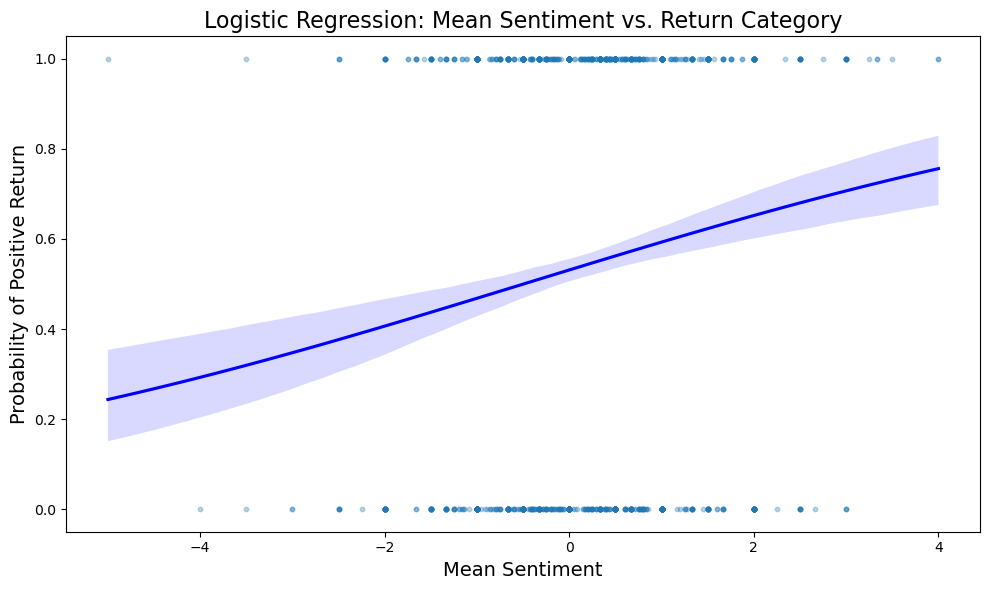

In [26]:
# We only plot the curve using 'mean', as this proves to be the only variable with significant effect. 
x = df_final['mean_sentiment']
#sns.regplot(y = ys, x = x, data = df_final, logistic = True)

# Plotting the logistic regression curve
plt.figure(figsize=(10, 6))  # Set the figure size
sns.regplot(y = ys, x = x, data = df_final, logistic=True, scatter_kws={'s':10, 'alpha':0.3}, line_kws={'color':'blue'})

# Adding title and labels
plt.title('Logistic Regression: Mean Sentiment vs. Return Category', fontsize=16)
plt.xlabel('Mean Sentiment', fontsize=14)
plt.ylabel('Probability of Positive Return', fontsize=14)
plt.tight_layout()

In [28]:
# Saving the figure
plt.savefig('Logistic Regression Curve.png', format='png', bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

#### Plotting the OLS regression

Text(0, 0.5, 'Daily Return')

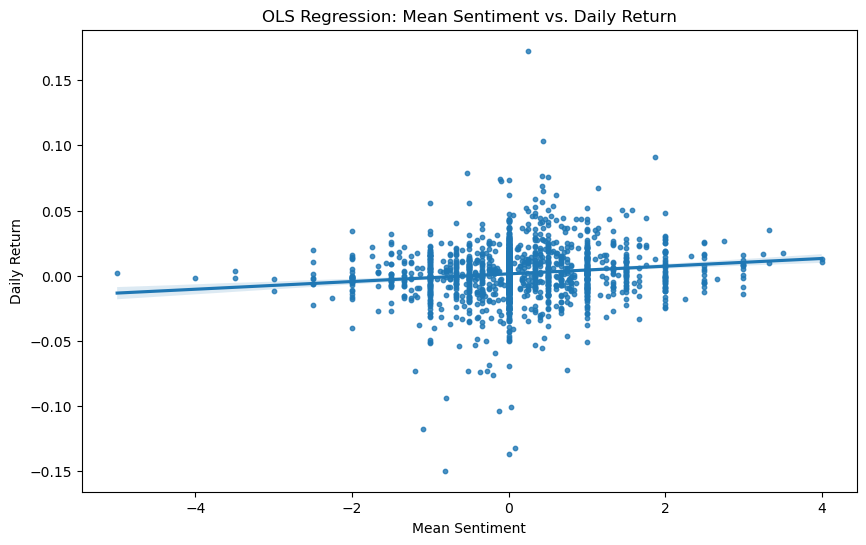

In [11]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Plotting the OLS regression
sns.regplot(y=df_final['daily_return'], x=df_final['mean'], data=df_final, scatter_kws={'s':10})
plt.title('OLS Regression: Mean Sentiment vs. Daily Return')
plt.xlabel('Mean Sentiment')
plt.ylabel('Daily Return')

In [12]:
# Saving the figure
plt.savefig('OLS Regression.png')  # dpi is optional, but it can increase the resolution of the saved image
plt.show()

<Figure size 640x480 with 0 Axes>